In [1]:
# Imports the SNPLookUp package
from main import *

In [2]:
# query(query_file, exclude_regions=True, version="hg19", save_to_txt=False, dir_name="raw_query_output")
# Runs the initial query of regions in the query bed file. 

# Params:
#    - query_file. Either a string containing the path to a .bed query file, or 
#          a list in the format of [ ["chr1", start_pos, end_pos, label], ... ].
#    - exclude_regions. Boolean. If True, regions listed in .bed files in the /excluded_regions 
#          folder will be excluded from the query. (default: True)
#    - version. String. States the genome version of the input chromosomal positions. 
#          (default: "hg19")
#    - save_to_txt. Boolean. If True, saves each query as a text file in 
#          output/dir_name/{query.label}.txt. (default: False)
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "raw_query_output")

# Returns a dictionary in the format of chromosome_number:list of QueryRegions
# i.e. {"1": [QueryRegion, ...], "2": []}

# Sample Usage:
test_query = query("..//test//test_query.bed", save_to_txt=True)

Initialising...	Excluding unwanted regions...
Done!
Creating QueryRegions...	Done!
Retrieving SNPs...
Retrieving SNPs from Chromosome 1...


49557487it [03:08, 262594.69it/s]


Chromosome 1 done!
Saving query to text...	Saved!
Done!


In [3]:
# def snp_filter(query_region, ldmatrix_access_token, gmaf, r2, max_number_of_snps, save_to_txt=False,
#                dirname="filter_output_all"):

# Filters the SNPs in the input query of regions based on the gmaf, ld and max_number. 
# Composite function of snp_filter_by_gmaf(), snp_filter_by_ld(), snp_filter_by_maxnum()

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects.
#    - ldmatrix_access_token. String token required to access the ldmatrix api cia requests
#    - gmaf. Float between 0.3 - 0.5. Minimum gmaf that SNPs in the QueryRegions must have.
#    - r2. Float between 0 and 1. Maximum linkage disequilibrium measured in terms of r^2 value 
#          between any two SNPs in each Query Region
#    - max_number_of_snps. Int capping the maximum number of SNPs in each region
#    - save_to_txt. Boolean. If True, saves each query as a text file in 
#          output/dir_name/{query.label}.txt. (default: False)
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "filter_output_all")

# Returns a dictionary in the format of chromosome_number:list of QueryRegions
# i.e. {"1": [QueryRegion, ...], "2": []}

# Sample Usage:
filtered_test_query = snp_filter(test_query, "0ff4d1fb247c", 0.45, 0.2, 50, save_to_txt=True)


filtered_test_query1 = snp_filter_by_ld(snp_filter_by_gmaf(test_query, 0.45, save_to_txt=False), "0ff4d1fb247c", 0.2, save_to_txt=True)

Filtering snps...
Filtering by gmaf of 0.45...	Done!
Filtering by LD of 0.2...
Retrieving ldmatrix for a total of 1522 SNPs in chr1 test...

Retrieving LDMatrix for SNPs 0-900
Retrieving LDMatrix for SNPs 450-1350
Retrieving ldmatrix for a total of 126 SNPs in chr1 test...

Retrieving ldmatrix for a total of 112 SNPs in chr1 test again...

Done!
Filtering by max 50 number of snps...	Done!


In [ ]:
# snp_filter_by_gmaf(query_region, gmaf, save_to_txt=False, dirname="filter_output_gmaf")

# Filters the SNPs in the input query of regions based on the gmaf. 

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects.
#    - gmaf. Float between 0.3 - 0.5. Minimum gmaf that SNPs in the QueryRegions must have.
#    - save_to_txt. Boolean. If True, saves each query as a text file in 
#          output/dir_name/{query.label}.txt. (default: False)
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "filter_output_gmaf")

# Returns a dictionary in the format of chromosome_number:list of QueryRegions
# i.e. {"1": [QueryRegion, ...], "2": []}

# Sample Usage:
# filtered_test_query_gmaf = snp_filter_by_gmaf(test_query, 0.45, save_to_txt=True)




# snp_filter_by_ld(query_region, ldmatrix_access_token, r2, save_to_txt=False, dirname="filter_output_ld")

# Filters the SNPs in the input query of regions based on. 

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects.
#    - ldmatrix_access_token. String token required to access the ldmatrix api cia requests
#    - r2. Float between 0 and 1. Maximum linkage disequilibrium measured in terms of r^2 value 
#          between any two SNPs in each Query Region
#    - save_to_txt. Boolean. If True, saves each query as a text file in 
#          output/dir_name/{query.label}.txt. (default: False)
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "filter_output_ld")

# Returns a dictionary in the format of chromosome_number:list of QueryRegions
# i.e. {"1": [QueryRegion, ...], "2": []}

# Sample Usage:
filtered_test_query_ld = snp_filter_by_ld(test_query, "0ff4d1fb247c", 0.2, save_to_txt=True)




# snp_filter_by_max_number(query_region, max_number_of_snps, save_to_txt=False, dirname="filter_output_maxnum")

# Filters the SNPs in the input query of regions, capping number of SNPs to max_number. This program tries 
# to select SNPs evenly in each QueryRegion to keep.

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects
#    - max_number_of_snps. Int capping the maximum number of SNPs in each region
#    - save_to_txt. Boolean. If True, saves each query as a text file in 
#          output/dir_name/{query.label}.txt. (default: False)
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "filter_output_maxnum")

# Returns a dictionary in the format of chromosome_number:list of QueryRegions
# i.e. {"1": [QueryRegion, ...], "2": []}

# Sample Usage:
# filtered_test_query_maxnum = snp_filter_by_max_number(test_query, 50, save_to_txt=True)

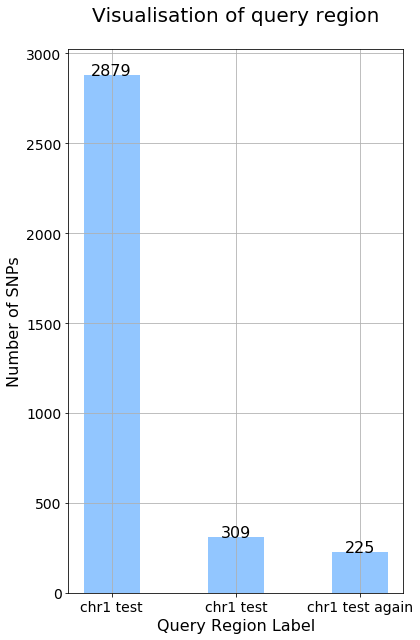

In [4]:
# visualise(query_region, save_to_jpeg=False, filename="visualisation")

# Visualises the number of SNPs in each QueryRegion

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects
#    - save_to_jpeg. Boolean. If True, saves each query as a text file in 
#          output/visualisation/filename.jpeg. (default: False)
#    - filename. String that sets the name of the file to save the figure. 
#          (default: "filter_output_maxnum")

# Returns None

# Sample Usage:
visualise(filtered_test_query_ld)

In [6]:
# save_for_design_studio(queryregions_by_chromosome, file_name = "input", dir_name = "input_for_design_studio")

# Saves the input QueryRegions into a .bed file and a .csv file that can be uploaded as input to Design Studio.

# Params:
#    - query_region. Either a list or dictionary of QueryRegion objects
#    - file_name. String that sets the name of the .bed and .csv files. (default: "input")
#    - dir_name. String that sets the name of the directory to save the output to. 
#          (default: "input_for_design_studio")

# Returns None

# Sample Usage:
save_for_design_studio(filtered_test_query, file_name="test_query")

Saving query as Design Studio input...	Done!
Queries saved in ..\output\input_for_design_studio


In [6]:
print(test_query)

{'1': [<query_objects.QueryRegion object at 0x0000026F8D95CCC0>, <query_objects.QueryRegion object at 0x0000026F8D95CE80>, <query_objects.QueryRegion object at 0x0000026F8D999B00>]}
